# Web Scrapping With BeautifulSoup
Here In this First part I am going to get(extract) some data from http://data.stackexchange.com/ and In the second part we will analyze it. A screenshot of website is attached below. So what I am going to extract is : Website Title, No of question posted, No of Answer Given, No of Comments done and No of Tags along with website description.
so Let's Beagan

In [1]:
from bs4 import BeautifulSoup
import urllib2

In [3]:
url='http://data.stackexchange.com/'
pageinfo = urllib2.urlopen(url).read()


In [5]:
soup=BeautifulSoup(pageinfo,'lxml')

In [120]:
def stackdata_scraper(soup):
    
    titles= soup.find_all('h2', attrs={'class': 'title'})
    web_title=[]
    for title in titles:
        try:
            web_title.append(str(title.next.next.string))
        except UnicodeEncodeError:
            web_title.append(title.next.next.string)
            
    taglines=soup.find_all('p',attrs={'class' :'tagline' })
    tagline_descr= []
    for tagline in taglines:
        try:
            tagline_descr.append(str(tagline.next))
        except UnicodeEncodeError:
            tagline_descr.append(tagline.next)



    stats=soup.find_all('ul',attrs={'class' :'stats' })
    questions=[]
    answers=[]
    comments=[]
    tags=[]

    for stat in stats:
        questions.append(str(stat.next.next.span.string))
        answers.append(str(stat.next.next.next_sibling.next.span.string))
        try:
            comments.append(str(stat.next.next.next_sibling.next.next_sibling.next.span.string))
        except AttributeError:
            comments.append('NaN')
        try:
            tags.append(str(stat.next.next.next_sibling.next.next_sibling.next.next_sibling.next.span.string))
        except AttributeError:
            tags.append('NaN')
        
    return web_title, tagline_descr, questions, answers,comments, tags
    


In [122]:
title, tagline, questions, answers,comments, tags= stackdata_scraper(soup)

In [123]:
print len(title), len(tagline), len(questions), len(answers),len(comments), len(tags)

177 177 177 177 177 177


In [4]:
import pandas as pd
import numpy as np

In [133]:
stackdata= pd.DataFrame(columns=['Website Title','Tagline','No of Question','No of Answers','No of Comments',
                                 'No of Tags'],index=np.arange(177))

In [134]:
stackdata['Website Title'] = title
stackdata['Tagline'] = tagline
stackdata['No of Question'] = questions
stackdata['No of Answers']= answers
stackdata['No of Comments']= comments
stackdata['No of Tags'] = tags


In [139]:
stackdata.to_csv(r'F:\sajjan\stackdata.csv', encoding='utf-8')

In [2]:
df=pd.read_csv(r'F:\sajjan\stackdata.csv',index_col=0)

In [3]:
df.head()

,Website Title,Tagline,No of Question,No of Answers,No of Comments,No of Tags
0,Stack Overflow,Q&A for programmers,13m,20m,53m,47k
1,Mathematics,Q&A for people studying math at any level and ...,687k,975k,3m,1.5k
2,Super User,Q&A for computer enthusiasts and power users,332k,495k,1.2m,5.2k
3,Ask Ubuntu,Q&A for Ubuntu users and developers,246k,322k,814k,3k
4,Server Fault,Q&A for system administrators and IT professio...,232k,394k,770k,3.5k


Let's do some cleaning for our data 

In [6]:
no_of_que= df['No of Question'].values
question_no=[]
for i in no_of_que:
    try:
        question_no.append(float(i)/1000)
    except ValueError:
        if i[len(i)-1:]=='m':
            question_no.append(float(i[:len(i)-1])*1000)
        else:
            question_no.append(float(i[:len(i)-1]))

In [7]:
no_of_answer=df['No of Answers'].values
answer_no=[]
for i in no_of_answer:
    try:
        answer_no.append(float(i)/1000)
    except ValueError:
        if i[len(i)-1:]=='m':
            answer_no.append(float(i[:len(i)-1])*1000)
        elif i == 'None':
            answer_no.append('NaN')
        else:
            answer_no.append(float(i[:len(i)-1]))


In [8]:
no_of_comment=df['No of Comments'].values
comment_no=[]
for i in no_of_comment:
    try:
        comment_no.append(float(i)/1000)
    except ValueError:
        if i[len(i)-1:]=='m':
            comment_no.append(float(i[:len(i)-1])*1000)
        elif i == 'None':
            comment_no.append('NaN')
        else:
            comment_no.append(float(i[:len(i)-1]))


In [9]:
no_of_tag= df['No of Tags'].values
tag_no=[]
for i in no_of_tag:
    try:
        tag_no.append(float(i)/1000)
    except ValueError:
        if i[len(i)-1:]=='m':
            tag_no.append(float(i[:len(i)-1])*1000)
        elif i == 'None':
            tag_no.append('NaN')
        else:
            tag_no.append(float(i[:len(i)-1]))



In [10]:
data_stack= pd.DataFrame(columns=['Website Title','Tagline','No of Question(In Thousands)','No of Answers(In Thousands)',
                                  'No of Comments(In Thousands)',
                                 'No of Tags(In Thousands)'],index=np.arange(177))

In [12]:
data_stack['Website Title'] = df['Website Title'].values
data_stack['Tagline'] = df['Tagline'].values
data_stack['No of Question(In Thousands)'] = question_no
data_stack['No of Answers(In Thousands)']= answer_no
data_stack['No of Comments(In Thousands)']= comment_no
data_stack['No of Tags(In Thousands)'] = tag_no


In [13]:
data_stack.head()

,Website Title,Tagline,No of Question(In Thousands),No of Answers(In Thousands),No of Comments(In Thousands),No of Tags(In Thousands)
0,Stack Overflow,Q&A for programmers,13000.0,20000,53000.0,47.0
1,Mathematics,Q&A for people studying math at any level and ...,687.0,975,3000.0,1.5
2,Super User,Q&A for computer enthusiasts and power users,332.0,495,1200.0,5.2
3,Ask Ubuntu,Q&A for Ubuntu users and developers,246.0,322,814.0,3.0
4,Server Fault,Q&A for system administrators and IT professio...,232.0,394,770.0,3.5


# Analyzing the Data

In [69]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Outlier Detection Using Scatter Plot:-
By plot a scatter graph, One can easly identify the outlier or large data point, Which can be a true value or false one ? Let's Check

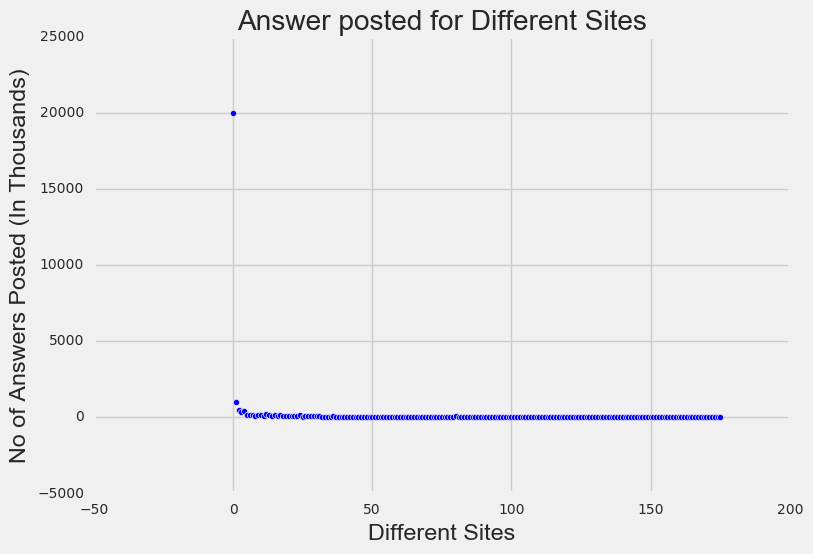

In [73]:
y_1=data_stack['No of Answers(In Thousands)'].values
x= np.arange(len(y_1))

plt.scatter(x,y_1)
plt.xlabel('Different Sites')
plt.ylabel('No of Answers Posted (In Thousands)')
plt.title('Answer posted for Different Sites')
plt.show()

Now By looking at the above graph One value is pretty high on y-axis which is equal to 20000. Which is exdanding our graph and making it difficult to read the plot. So To Clear understand our graph We will remove such large point and replot our graph. In this case It is not an Outlier but still I am filtering it. <br>

Now Let's Filter our data a little bit and then plot.

150.666477273
171


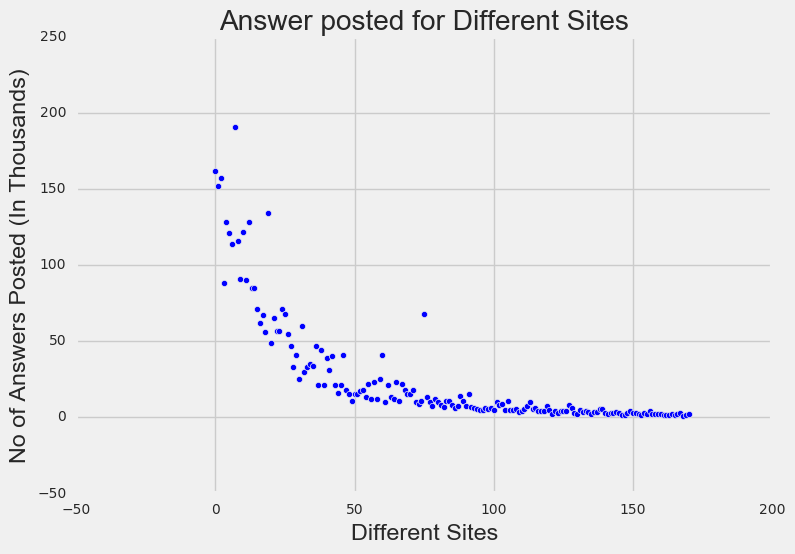

In [78]:
y=data_stack['No of Answers(In Thousands)'].values
y=y[y != 'NaN']
print y.mean()
y= y[y < 2*(y.mean())]
print len(y)
x= np.arange(len(y))
#colors = np.random.rand(len(y))
plt.scatter(x,y)
plt.xlabel('Different Sites')
plt.ylabel('No of Answers Posted (In Thousands)')
plt.title('Answer posted for Different Sites')
plt.show()

Now How Many Data point we have filterd in the above case? <br>
6<br>
After removing we plot the graph which is much understoodable than the previous one.

31.8522988506
169


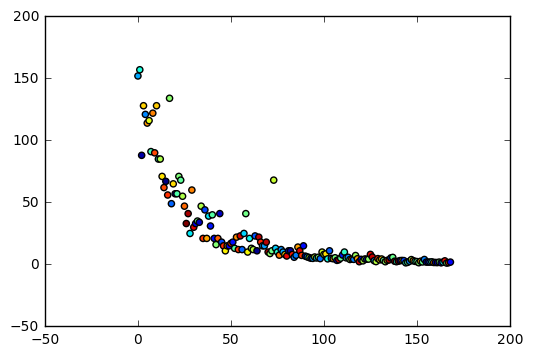

In [61]:
y1=data_stack['No of Question(In Thousands)'].values
y1=y[y != 'NaN']
print y1.mean()
y1= y1[y1 < 5*(y.mean())]
print len(y1)
x= np.arange(len(y1))
colors = np.random.rand(len(y1))
plt.scatter(x,y1,c=colors)
plt.show()

In [62]:
import seaborn as sns

AttributeError: 'module' object has no attribute 'plot'